### Factorial

In [2]:
def fact(n):
    """pre: int n >= 0
    Returns n!"""
    if n == 0:
        return 1
    else:
        return n*fact(n - 1)

In [3]:
for i in range(10):
    print fact(i),

1 1 2 6 24 120 720 5040 40320 362880


### Fibonacci

Naïve version: many computations are repeated

In [4]:
def fib(n):
    """pre: int n >= 0
    Exponential version
    Returns Fibonacci of n"""
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In this next version we use _memoization_, i.e., we keep the computed solutions for later use.

In [5]:
def fibMem(n):
    """pre: int n >= 0
    Linear version using memoization, ie, save all solutions to avoid doing things twice
    Returns Fibonacci of n"""
    
    UNKNOWN = -1
    sols = [1,1] + [UNKNOWN]*(n-1)  # solution array (initially we only know the base cases)
    
    def fibMemR(n):
        if sols[n] != UNKNOWN:                # if already known, no need to recompute it
            return sols[n]
        sols[n] = fibMemR(n-1) + fibMemR(n-2) # save the solution for future needs
        return sols[n]
    
    return fibMemR(n)    

In [6]:
for i in range(20):
    print fib(i),
print
for i in range(20):
    print fibMem(i),

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765
1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765


### Compare performance between versions

In [7]:
import time

n = 25

times = [0]*n
for i in range(n):
    start_time = time.clock()
    fib(i)
    times[i] = time.clock() - start_time
    
timesMem = [0]*n
for i in range(n):
    start_time = time.clock()
    fibMem(i)
    timesMem[i] = time.clock() - start_time 

Let's plot both times arrays to check their behaviour when the input increases. Also note the times each version takes to finish.

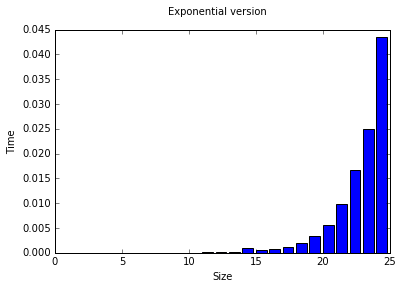

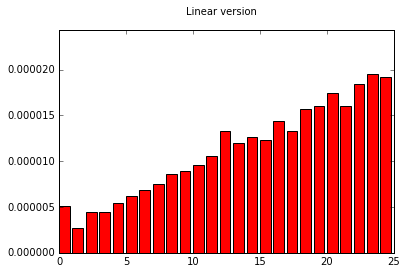

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.bar(np.arange(n), times)
plt.suptitle('Exponential version')
plt.xlabel('Size')
plt.ylabel('Time')
plt.show()

plt.bar(np.arange(n), timesMem, color='r')
plt.suptitle('Linear version')
axes = plt.gca()
axes.set_ylim([0,max(timesMem)*1.25])
plt.show()

### Recursion in a text function

In [9]:
def isPalindrome(s):
    """Assumes s is a str
    Returns True if the letters in s form a palindrome;
    False otherwise. Non-letters and capitalization are ignored."""
    
    def toChars(s):
        s = s.lower()
        letters = ''
        for c in s:
            if c in 'abcdefghijklmnopqrstuvwxyz':
                letters = letters + c
        return letters
    
    def isPal(s):
        if len(s) <= 1:
            return True
        else:
            return s[0] == s[-1] and isPal(s[1:-1])
    
    return isPal(toChars(s))

In [10]:
print isPalindrome('Deliver desserts - demanded Nemesis - emended, named, stressed, reviled.')
print isPalindrome('This is surely not a palindrome')

True
False


### Other Egs

Finding Maximum recursively

In [11]:
def maxR(xs):
    """Assumes a non-empty list of ints"""
    if len(xs)==1:
        return xs[0]

    maxTail = maxR(xs[1:])                        # find max of remaining list, recursively
    return xs[0] if xs[0] > maxTail else maxTail

In [12]:
import random

L3 = [int(100*random.random()) for i in range(20)]  # list of 20 random numbers between [0,99]
print L3
print maxR(L3)

[57, 41, 32, 47, 82, 24, 39, 22, 58, 63, 85, 34, 5, 42, 53, 39, 41, 38, 21, 42]
85


Euclide's greatest common divider

In [13]:
# from the std library (iterative version)
def gcd(a, b):
    """Calculate the Greatest Common Divisor of a and b.

    Unless b==0, the result will have the same sign as b (so that when
    b is divided by it, the result comes out positive).
    """
    while b:
        a, b = b, a%b
    return a

print gcd(2016,192)

96


In [14]:
# recursive version:

def gcdR(a, b):
    if b == 0:
        return a

    return gcdR(b, a%b)

In [15]:
print gcdR(2016,192)

96


Hanoi Towers, check [ref](https://en.wikipedia.org/wiki/Tower_of_Hanoi) for description and rules

In [16]:
def hanoi(n):
    
    def hanoiR(n, origin, destination, temp):
        if n==1:
            print "move disk 1 : ", origin, "->", destination
        else:
            hanoiR(n-1, origin, temp, destination)
            print "move disk", n, ": ", origin, "->", destination
            hanoiR(n-1, temp, destination, origin)
    
    hanoiR(n, "A", "C", "B")

In [17]:
hanoi(4)

move disk 1 :  A -> B
move disk 2 :  A -> C
move disk 1 :  B -> C
move disk 3 :  A -> B
move disk 1 :  C -> A
move disk 2 :  C -> B
move disk 1 :  A -> B
move disk 4 :  A -> C
move disk 1 :  B -> C
move disk 2 :  B -> A
move disk 1 :  C -> A
move disk 3 :  B -> C
move disk 1 :  A -> B
move disk 2 :  A -> C
move disk 1 :  B -> C


Permutations, [ref](http://stackoverflow.com/questions/104420/how-to-generate-all-permutations-of-a-list-in-python)

In [18]:
def permutations(head, tail=''):
    if len(head) == 0: 
        print tail,
    else:
        for i in range(len(head)):
            permutations(head[0:i] + head[i+1:], tail+head[i])

In [19]:
permutations('*abc')

*abc *acb *bac *bca *cab *cba a*bc a*cb ab*c abc* ac*b acb* b*ac b*ca ba*c bac* bc*a bca* c*ab c*ba ca*b cab* cb*a cba*
